

# Project: No-Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Data Description
The No-show appointments dataset contains 110,527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. In this project, I will explore different factors presented in this dataset in relation to if a patient shows up for their appointment or not.

Data Dictionary 
1. PatientId: Identification of a patient 
2. AppointmentID: Identification of each appointment 
3. Gender: Male or Female. Female is the greater proportion, woman takes way more care of they health in comparison to man. 
4. Data Appointment: The day of the actuall appointment, when they have to visit the doctor.
5. Data scheduled: The day someone called or registered the appointment, this is before appointment of course.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: True of False . States if the patient is on the Bolsa Família scholarship.
9. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False 
13. SMS_received: 1 or more messages sent to the patient. 
14. No-show: True or False.

### Questions for Analysis
1. What percentage of patients showed up for their appointment?
2. Is there a difference between how patients of both genders showed up for their appointment?
3. Is there a difference bewteen how patients in different age groups shhowed up for their appointment?
4. Is there a difference bewteen how patients who received/didn't receive SMS showed up for their appointment?
5. Is there a difference between how patient with/without scholarship showed up for their appointment?
6. Is there a difference between how patients with/without medical conditions(diabetes, hypertension, alcoholism, handicap) show up for their appointment?
7. What day of the week and month of the year do patients show up for appointments most?
8. Does wait time(period between when an appointment was scheduled and the actual appointment day) affect if patients show up for their appointments?
9. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 
10. What are the top 5 neighborhoods that showed up for their appointments?

In [2]:
#Importing all libraries I plan to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling





In [3]:

#Load the 'noshowappointments' data and view the first five rows
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The data has been loaded and now I will perform operations to inspect datatypes and look for instances of missing or possibly errant data.

In [3]:
#View the number of rows and columns
df.shape

(110527, 14)

In [4]:
#View the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#View statistical information on the dataset
df.describe(include=['object'])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


The dataframe above shows statistical information about numerical columns in the dataset. The Age column has a min value of -1 which might be an error.

In [7]:
#check for missing values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#check for duplicates
df.duplicated().sum()

0

There are no missing values and no duplicates in this dataset.

In [9]:
#There are two ID columns, I will check those out
#(AppointmentID, PatientID)
df["AppointmentID"].nunique(), df["PatientId"].nunique()

(110527, 62299)

There are 110527 unique appointment Ids, which is the same as the number of rows, and less patient IDs, this means that the Appointment IDs are the unique identifiers of each row and patient ids can be repeated. A patient can have more than one appointment, hence more than one appointment id


### Data Cleaning


From inspecting the data, I noticed that the column names were inconsistent, so I'll rename all the columns so analysis can be easier. Also, the data types of the "AppointmentDay" and "ScheduledDay" are objects(strings), when they should be Datetime, so the two columns have to be converted to the right data type. To make analysis easier, so we can see the correlation between "No-show" column and other numeric columns, it will be best to convert this column to have 0's and 1's instead of yes and no. The minimum age is -1,which is unusual, I would inspect this further. To answer the research question about day of week, I will extract the day of the week from the given date and also create a new column to display thow long a patient waited between scheduled day and appointment day

In [10]:
#View the column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
#Rename columns
df=df.rename(columns = {"PatientId" : "patient_id", "AppointmentID" : "appointment_id", 
                        "Gender" : "gender", "ScheduledDay" : "scheduled_day", "AppointmentDay": "appointment_day", 
                        "Age" : "age", "Neighbourhood" : "neighborhood", "Scholarship" : "scholarship", 
                        "Hipertension" : "hypertension", "Diabetes" : "diabetes", "Alcoholism": "alcoholism", 
                        "Handcap": "handicap", "SMS_received" : "sms_received", "No-show" : "no_show" })
#view first row to confirm changes
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


The columns have now been renamed to make code consistent and easy to read and write.

In [12]:
#Convert the appointment_day and scheduled_day colums to datetime and extract the dates
df["scheduled_day"] = pd.to_datetime(df["scheduled_day"]).dt.date
df["appointment_day"] = pd.to_datetime(df["appointment_day"]).dt.date


#check the datatypes now
df.dtypes

patient_id         float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighborhood        object
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
handicap             int64
sms_received         int64
no_show             object
dtype: object

pd.todatetime() converted the date column to datetime objects as required, then .date extracted just the date from the values in the columns so that I can work with them. The datatypes are objects because I extracted the date alone as a string.

In [13]:
#Retrieve the day of week and month of each date 
df["scheduled_day_of_week"] = pd.to_datetime(df["scheduled_day"]).dt.day_name()
df["appointment_day_of_week"] = pd.to_datetime(df["scheduled_day"]).dt.day_name()

df["scheduled_month"] = pd.to_datetime(df["scheduled_day"]).dt.month_name()
df["appointment_month"] = pd.to_datetime(df["scheduled_day"]).dt.month_name()

I have now retrieved the name of the days and months, so I won't have the number representations, for easy reading.

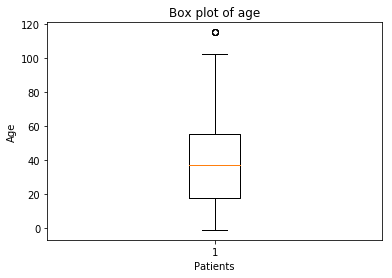

In [14]:
#plot a boxplot of the age column to check for outliers
plt.boxplot(df["age"])
plt.ylabel("Age")
plt.xlabel("Patients")
plt.title("Box plot of age");

The boxplot shows presence of outlier, however it doesn't account for the value of -1 that was seen as the minimum value in the age column.

In [15]:
#View the rows with values less than 0 in the age column
df[df["age"] < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_of_week,appointment_day_of_week,scheduled_month,appointment_month
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,Monday,Monday,June,June


There is only one patient with age of  -1, this is most likely an error, so this row will be dropped. I will also inspect the outlier detected in the boxplot(>100)


In [16]:
#Drop the row at index 99832
df.drop(labels=[99832], axis=0, inplace=True)

In [17]:
#Confirm changes
df.iloc[99832]

patient_id                    2.89827e+13
appointment_id                    5774075
gender                                  M
scheduled_day                  2016-06-06
appointment_day                2016-06-06
age                                     1
neighborhood               FORTE SÃO JOÃO
scholarship                             0
hypertension                            0
diabetes                                0
alcoholism                              0
handicap                                0
sms_received                            0
no_show                                No
scheduled_day_of_week              Monday
appointment_day_of_week            Monday
scheduled_month                      June
appointment_month                    June
Name: 99833, dtype: object

The row with errant data has been dropped, and so .iloc cannot locate its index, it located the next one instead

In [18]:
#Check for age values > 100
df[df["age"] > 100]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_of_week,appointment_day_of_week,scheduled_month,appointment_month
58014,9.762948e+14,5651757,F,2016-05-03,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No,Tuesday,Tuesday,May,May
63912,3.196321e+13,5700278,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,Monday,Monday,May,May
63915,3.196321e+13,5700279,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,Monday,Monday,May,May
68127,3.196321e+13,5562812,F,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes,Friday,Friday,April,April
76284,3.196321e+13,5744037,F,2016-05-30,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No,Monday,Monday,May,May
90372,2.342836e+11,5751563,F,2016-05-31,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No,Tuesday,Tuesday,May,May
97666,7.482346e+14,5717451,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No,Thursday,Thursday,May,May


Close inspection of the dataframe above shows there are 2 patients of 102 years and 2 patients of 115 years, these entries seem to be accurate so they will not be dropped

In [19]:
#convert no-show column to numeric, create a dummy and assign 0 to "No" and 1 to "Yes" using .replace()
df["no_show"] = df["no_show"].replace(['No', 'Yes'], [0, 1])
#confirm that changes were made
df["no_show"].head()

0    0
1    0
2    0
3    0
4    0
Name: no_show, dtype: int64

The no_show column has been converted so that 0 represents "No", and 1 represents "Yes". I did this so I would be able to check correlations with other columns in the dataframe.

In [20]:
#Create wait_time column


df["wait_time"] = df["appointment_day"] - df["scheduled_day"]
#view the first few rows
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_of_week,appointment_day_of_week,scheduled_month,appointment_month,wait_time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,April,April,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,April,April,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,April,April,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,April,April,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,April,April,0 days


The wait_time column will be used to determine if the period of time between when a person is scheduled for an appointment and the actual appointment day will affected if the patient showed up.

In [21]:
#Drop scheduled_day, appointment_day, patient_id, appointment_id and neighborhood columns
df.drop(columns=["scheduled_day", "appointment_day", "patient_id", "appointment_id"], axis=1, inplace=True)
#Confirm changes
df.head(2)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_of_week,appointment_day_of_week,scheduled_month,appointment_month,wait_time
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,April,April,0 days
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,April,April,0 days


Since I do not have research questions around the patient_id and appointment_id, they were dropped. Also, the scheduled_day and appointment_day columns were dropped because I have already gotten the information I need from them.

<a id='eda'></a>
## Exploratory Data Analysis





### Research Question 1 (What percentage of patients showed up for their appointment?)

In [7]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

,no_show
no_show,
0,88207
1,22319


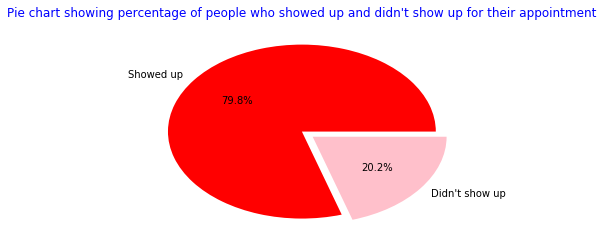

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#First count the total number of patients who showed up and didn't show up 
df.groupby("no_show")["no_show"].count()

yes_show = df.groupby("no_show")["no_show"].count()[0]
no_show = df.groupby("no_show")["no_show"].count()[1]

#Plot a pie chart showing percentage of patients who showed up and didn't show up for their appointment
plt.pie([yes_show, no_show], labels=["Showed up", "Didn't show up"], autopct='%1.1f%%', colors=["red", "pink"], explode=(0, 0.1))
plt.title("Pie chart showing percentage of people who showed up and didn't show up for their appointment", color="blue");

df.groupby(["no_show"])[["no_show"]].count()


The pie chart shows that only 20.2% of patients didn't show up for their appointment

### Research Question 2  (Is there a difference between how patients of both genders showed up for their appointment?)

In [23]:
def PropFunc(column):
    '''This function is used to calculate proportions of each value in a column with 
        2 categories in relation to if they show up or not'''
    #Group df by column and no_show and count the values
    column_dist = df.groupby([column, "no_show"])["no_show"].count()
    
    #Get the total number of patients by column
    column_totals = df.groupby(column).count()['no_show']

    #Get the proportion of patients who showed up and didn't show up by column
    if column == "gender":
        prop1 = column_dist["F"] / column_totals["F"]
        prop2 = column_dist["M"] / column_totals["M"]
    else:
        prop1 = column_dist[0] / column_totals[0] #proportions of patients who are in first group
        prop2 = column_dist[1] / column_totals[1] #proportions of patients who are in second group
    
    return (prop1, prop2)

In [24]:
def BarFunc1(column_name, c_labels, title):
    '''This function creates bar charts for columns with 2 categories'''
    #
    ind = np.arange(len(column_name[0])) 
    width = 0.35
    bars1 = plt.bar(ind, column_name[0], width, color='red', alpha=.7)
    bars2 = plt.bar(ind + width, column_name[1], width, color='blue', alpha=.7)
    #set labels
    plt.xlabel("Showed up or not", fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    #set xticks
    labels = ["Showed up", "Didn't show up"]
    locations = ind + width / 2 
    plt.xticks(locations, labels)
    #set legend and title
    plt.legend(c_labels)
    plt.title(title, fontsize=15);

In [25]:
def StatsFunc(column_name):
    '''This function is used to compute summary statistics to be displayed together with the plot'''
    
    df_sum = pd.concat([column_name[0], column_name[1]], axis=1)
    if column_name == "gender":
        df_sum.columns = ['Female', 'Male']
    else:
        df_sum.columns = ['No', 'Yes']
    return df_sum

In [26]:
#Get the proportions of gender grouped by no_show column
gender = PropFunc("gender")
#View the returned value
gender

(no_show
 0    0.796851
 1    0.203149
 Name: no_show, dtype: float64, no_show
 0    0.800321
 1    0.199679
 Name: no_show, dtype: float64)

,No,Yes
no_show,,
0,0.796851,0.800321
1,0.203149,0.199679


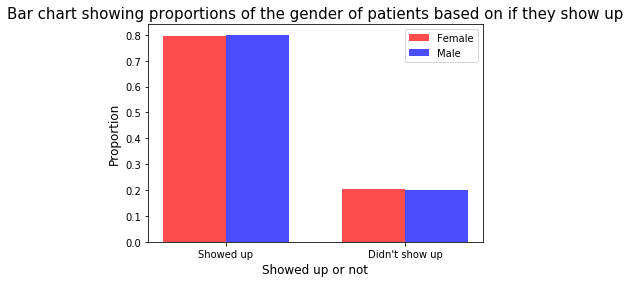

In [27]:
#Plot a bar chart for gender
title = "Bar chart showing proportions of the gender of patients based on if they show up" 
BarFunc1(gender, ["Female", "Male"], title)
#Show the statistics together with the plot
StatsFunc(gender)

The bar chart above shows that the proportion of females who showed up is slightly less than the proportion for males. Also, the proportion of males who showed up is a lot higher than the proportion of males who didn't, same with females. 
In figures; 79.69% of female patients showed up for their appointment and 80.03% of male patients showed up for their appointment.


### Research Question 3(Is there a difference bewteen how patients in different age groups showed up for their appointment?)

Analyze different age groups and how they showed up for their appointments according to following categories gotten from https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age Children: 0-12 Teenagers: 13-19 Adults: 20-39 Middle-age adult: 40-59 Senior adult: 60+

In [31]:
bin_edges = [0, 12, 19, 39, 59, 119]
#Name each wait time category based on statistics of  the column
bin_names = ["Children", "Teenagers", "Adults", "Middle-age Adults", "Senior Adults"]

#create a new column to show wait categories
df["age_cat"] = pd.cut(x=df["age"], bins=bin_edges, labels=bin_names)


In [33]:
#Get the count of no_show in each age category
age_count = df.groupby(["age_cat", "no_show"])["no_show"].count()
#get the total age count
age_totals = df.groupby("age_cat").count()["no_show"]
#get the proportions
age_proportions = age_count/age_totals
age_proportions



age_cat            no_show
Children           0          0.790364
                   1          0.209636
Teenagers          0          0.740373
                   1          0.259627
Adults             0          0.768618
                   1          0.231382
Middle-age Adults  0          0.811918
                   1          0.188082
Senior Adults      0          0.846880
                   1          0.153120
Name: no_show, dtype: float64

In [34]:
#Create lists to show the proportion of patients who showed up
#and didn't show up in each age grop
show_prop_list = []
noshow_prop_list = []
for bin in bin_names:
    show_prop_list.append(age_proportions[bin][0])
for bin in bin_names:
    noshow_prop_list.append(age_proportions[bin][1])

,show_prop,no-show prop
0,0.790364,0.209636
1,0.740373,0.259627
2,0.768618,0.231382
3,0.811918,0.188082
4,0.846880,0.153120


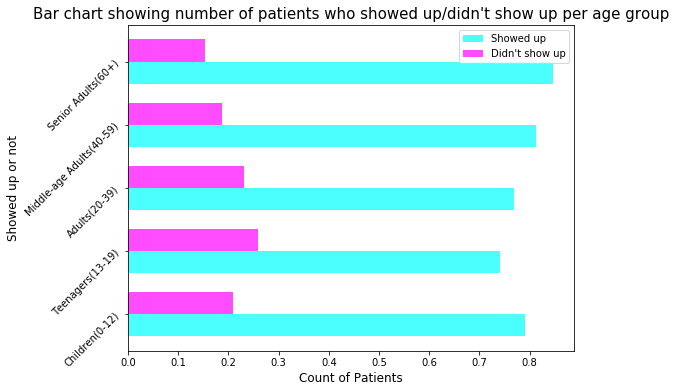

In [35]:
#Create a bar plot showing the number of patients who showed up and didn't show up for their appointment
#on age group

plt.figure(figsize=(8,6))
ind = np.arange(len(show_prop_list)) 
width = 0.35
show_bars = plt.barh(ind, show_prop_list, width, color='cyan', alpha=.7);
noshow_bars = plt.barh(ind + width, noshow_prop_list, width, color='magenta', alpha=.7)
plt.ylabel("Showed up or not", fontsize=12)
plt.xlabel("Count of Patients", fontsize=12)
plt.title("Bar chart showing number of patients who showed up/didn't show up per age group", fontsize=15)

#set yticks
labels = ["Children(0-12)", "Teenagers(13-19)", "Adults(20-39)", "Middle-age Adults(40-59)", "Senior Adults(60+)"]
locations = ind + width / 2 
plt.yticks(locations, labels, rotation=45)

#set legend
plt.legend(["Showed up", "Didn't show up"]);

#Show the statistics together with the plot
pd.DataFrame({"show_prop": show_prop_list, "no-show prop": noshow_prop_list})

The bar chart above shows that the proportion of senior adults who showed up for their appointment is the highest. Next is middle age adults and then children. Teenagers proportion of patients who showed up for their appointment is the least. In figures; 79.53% of children, 74.04% of teenagers , 76.86% of adults , 81.19% of middle age adults, and 84.69% of senior adults showed up for their appointment.

### Research Question 4(Is there a difference bewteen how patients who received/didn't receive SMS showed up for their appointment?)

In [36]:
#Get the proportions of patients who received sms  grouped by no_show column
sms = PropFunc("sms_received")
#View the returned value; 0 means the patient didn't receive SMS, 1 means the patients received 1 or more SMS
sms

(no_show
 0    0.832965
 1    0.167035
 Name: no_show, dtype: float64, no_show
 0    0.724255
 1    0.275745
 Name: no_show, dtype: float64)

,No,Yes
no_show,,
0,0.832965,0.724255
1,0.167035,0.275745


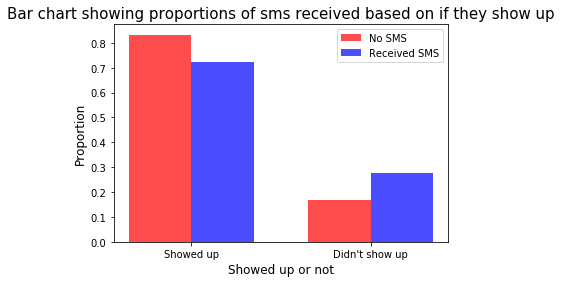

In [37]:
#Plot a bar chart of sms received
title = "Bar chart showing proportions of sms received based on if they show up" 
BarFunc1(sms, ["No SMS", "Received SMS"], title)
#Show the statistics together with the plot
StatsFunc(sms)

The bar chart above shows that the proportion of patients who received SMS and showed up for their appointment is less than the proportion of patients who didn't receive SMS and showed up for their appointment. In other words, receiving SMS did not make patients show up more for their appointments. In figures; 83.3% of patients who did not receive SMS showed up for their appointment while 72.43% of patients who received SMS showed up for their appointments.

### Research Question 5(Is there a difference between how patient with/without scholarship showed up for their appointment?)

In [38]:
#Get the proportions of scholarships grouped by no_show column
scholarship = PropFunc("scholarship")
#View the returned value
scholarship

(no_show
 0    0.801926
 1    0.198074
 Name: no_show, dtype: float64, no_show
 0    0.762637
 1    0.237363
 Name: no_show, dtype: float64)

,No,Yes
no_show,,
0,0.801926,0.762637
1,0.198074,0.237363


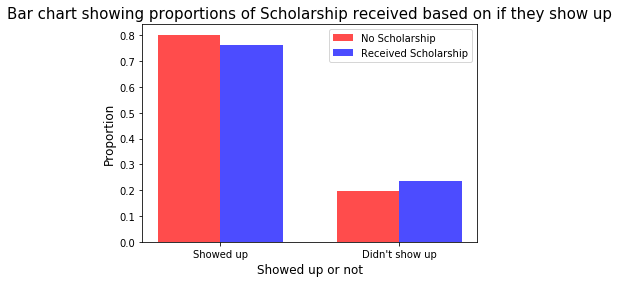

In [39]:
#Plot a bar chart of scholarship
title = "Bar chart showing proportions of Scholarship received based on if they show up"
BarFunc1(scholarship, ["No Scholarship", "Received Scholarship"], title)
#Show the statistics together with the plot
StatsFunc(scholarship)

The bar plot above shows that the proportion of patients who did  not receive scholarship and showed up is higher than the proportion of patients who received scholarship and showed up. In figures; 80.19% of patients who did not receive scholarship showed up while 76.26% of patients who received scholarship showed up.

### Research Question 6(Is there a difference between how patients with/without medical conditions(diabetes, hypertension, alcoholism, handicap) show up for their appointment?)

### Hypertension

In [40]:
#Get the proportions of hypertension grouped by no_show column
hypertension = PropFunc("hypertension")
#View the returned value
hypertension

(no_show
 0    0.790961
 1    0.209039
 Name: no_show, dtype: float64, no_show
 0    0.82698
 1    0.17302
 Name: no_show, dtype: float64)

,No,Yes
no_show,,
0,0.790961,0.82698
1,0.209039,0.17302


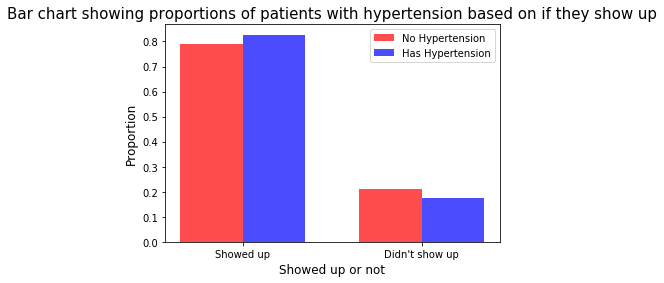

In [41]:
#Plot a bar chart of hypertension
title = "Bar chart showing proportions of patients with hypertension based on if they show up"
BarFunc1(hypertension, ["No Hypertension", "Has Hypertension"], title)
#Diplay summary statistics
StatsFunc(hypertension)

The bar chart abve shows that a higher proportion of patients with  hypertension showed up for their appointment than those without hypertension. In figures; 82.7% of patients with hypertension showed up for their appointment while 79.1% of patients without hypertension showed up.

### Diabetes

In [42]:
#Get the proportions of diabetes grouped by no_show column
diabetes = PropFunc("diabetes")
#View the returned value
diabetes

(no_show
 0    0.79637
 1    0.20363
 Name: no_show, dtype: float64, no_show
 0    0.819967
 1    0.180033
 Name: no_show, dtype: float64)

,No,Yes
no_show,,
0,0.79637,0.819967
1,0.20363,0.180033


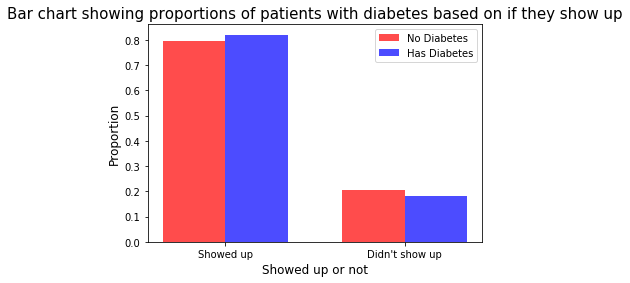

In [43]:
#Plot a bar chart of diabetes
title = "Bar chart showing proportions of patients with diabetes based on if they show up"
BarFunc1(diabetes, ["No Diabetes", "Has Diabetes"], title)
#Diplay summary statistics
StatsFunc(diabetes)

The bar chart above shows that a higher proportion of patients with diabetes showed up for their appointment than those without diabetes. In figures; 82% of patients with diabetes showed up for their appointment while 79.63% of patients without diabetes showed up.

### Alcoholism

In [44]:
#Get the proportions of alcoholism grouped by no_show column
alcoholism = PropFunc("alcoholism")
#View the returned value
alcoholism

(no_show
 0    0.798052
 1    0.201948
 Name: no_show, dtype: float64, no_show
 0    0.798512
 1    0.201488
 Name: no_show, dtype: float64)

,No,Yes
no_show,,
0,0.798052,0.798512
1,0.201948,0.201488


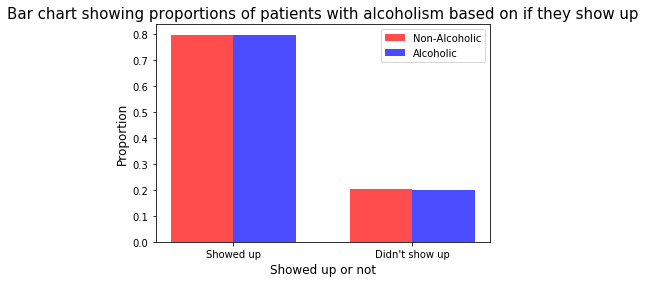

In [45]:
#Plot a bar chart of alcoholism
title = "Bar chart showing proportions of patients with alcoholism based on if they show up"
BarFunc1(alcoholism, ["Non-Alcoholic", "Alcoholic"], title)
#Diplay summary statistics
StatsFunc(alcoholism)

The bar chart above shows there is hardly any difference between the proportion of patients with alcoholism and those without showing up for their appointment. About 80% of patients in both categories showed up for their appointment.

### Handicap

In [46]:
#Get the proportions of handicap grouped by no_show column
handicap = PropFunc("handicap")
#View the returned value
handicap

(no_show
 0    0.797645
 1    0.202355
 Name: no_show, dtype: float64, no_show
 0    0.820764
 1    0.179236
 Name: no_show, dtype: float64)

,No,Yes
no_show,,
0,0.797645,0.820764
1,0.202355,0.179236


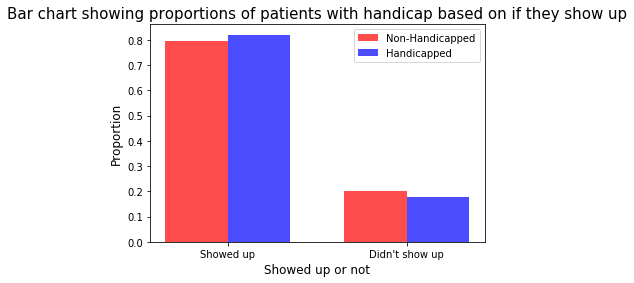

In [47]:
#Plot a bar chart of handicap
title = "Bar chart showing proportions of patients with handicap based on if they show up"
BarFunc1(handicap, ["Non-Handicapped", "Handicapped"], title)
#Diplay summary statistics
StatsFunc(handicap)

The bar chart above shows that the proportion of patients who are handicapped and showed up for their appointment is higher than the proportion of patients who are not handicapped and showed up for their appointment. In figures; 82.08% of handicapped patients showed up for their appointment showed while 79.76% of patients who are not handicapped showed up for their appointment,

Generally, there's no much difference between how patients show up in different categories in the columns, the results for the columns would have to be subjected to statistical tests to test if the differences are significant and can be used to determine whether or not a patient will show up for their appointment. However, people with health conditions generally showed up more for their appointments than people without health conditions

### Research Question 7(What day of the week and month of the year do patients show up for appointments most?)

### Day of Week

In [48]:
#View the first few columns
df.head()

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_of_week,appointment_day_of_week,scheduled_month,appointment_month,wait_time,age_cat
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,April,April,0 days,Senior Adults
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,April,April,0 days,Middle-age Adults
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,April,April,0 days,Senior Adults
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,April,April,0 days,Children
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,April,April,0 days,Middle-age Adults


In [49]:
#Group by appointment-day_of_week and no_show and view the result
a_day = df.groupby(["appointment_day_of_week", "no_show"])["no_show"].count()
a_day

appointment_day_of_week  no_show
Friday                   0          15028
                         1           3887
Monday                   0          18523
                         1           4561
Saturday                 0             23
                         1              1
Thursday                 0          14373
                         1           3700
Tuesday                  0          20877
                         1           5291
Wednesday                0          19383
                         1           4879
Name: no_show, dtype: int64

The dataframe above doesn't return anything for sunday, I will check if there are appointments on sundays and scheduled days on sunday

In [50]:
#check for sunday in appointment_day_of_week
df[df["appointment_day_of_week"] == "Sunday"]

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_of_week,appointment_day_of_week,scheduled_month,appointment_month,wait_time,age_cat


In [51]:
#check for sunday in scheduled day of week
df[df["scheduled_day_of_week"] == "Sunday"]

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_of_week,appointment_day_of_week,scheduled_month,appointment_month,wait_time,age_cat


There are no appointment days or scheduled days on Sunday

In [52]:
#create a list of the counts in each day of patients who showed up for their appointment
show_list = []
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
for label in labels:
    show_list.append(a_day[label][0])
    
#Append 0 to the list as the value for Sunday  
show_list.append(0)
show_list

[18523, 20877, 19383, 14373, 15028, 23, 0]

In [53]:
#create a list of the counts in each day of patients who did not show up for their appointment
noshow_list = []
for label in labels:
    noshow_list.append(a_day[label][1])
    
#Append 0 to the list as the value for Sunday  
noshow_list.append(0)
noshow_list

[4561, 5291, 4879, 3700, 3887, 1, 0]

,show_prop,no-show prop
0,18523,4561
1,20877,5291
2,19383,4879
3,14373,3700
4,15028,3887
5,23,1
6,0,0


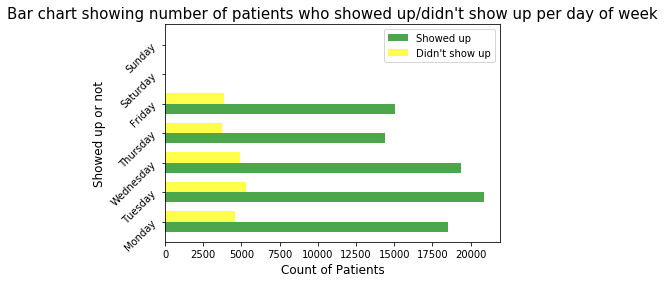

In [54]:
#Create a bar plot showing the number of patients who showed up and didn't show up for their appointment
#on each day of the week

ind = np.arange(len(show_list)) 
width = 0.35
show_bars = plt.barh(ind, show_list, width, color='green', alpha=.7);
noshow_bars = plt.barh(ind + width, noshow_list, width, color='yellow', alpha=.7)
plt.ylabel("Showed up or not", fontsize=12)
plt.xlabel("Count of Patients", fontsize=12)
plt.title("Bar chart showing number of patients who showed up/didn't show up per day of week", fontsize=15)

#set yticks
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
locations = ind + width / 2 
plt.yticks(locations, labels, rotation=45)

#set legend
plt.legend(["Showed up", "Didn't show up"]);

#Show the statistics together with the plot
pd.DataFrame({"show_prop": show_list, "no-show prop": noshow_list})

The bar plot above shows that patients showed up the most for their appointment on Tuesday, followed by Wednesday, then Monday, then Friday, then Thursady and lastly Saturday and Sunday. The bar chart however doesn't show the number of patients who showed up(23) and didn't show up(1) for their appointment on Saturday, this is because of the very large range between the number of values on aSaturday and other days. There are no patients scheduled on Sunday or given appointments for Sunday.

### Month of year

In [55]:
#Group by appointment_month and no_show and view the result
a_month = df.groupby(["appointment_month", "no_show"])["no_show"].count()
a_month

appointment_month  no_show
April              0          17490
                   1           7849
December           0             42
                   1             19
February           0            199
                   1             82
January            0             42
                   1             18
June               0          12363
                   1           1386
March              0           2418
                   1           1196
May                0          55652
                   1          11769
November           0              1
Name: no_show, dtype: int64

The dataframe above shows there are no appointments between July and November

In [56]:
labels = ["January", "February", "March", "April", "May", "June", "December"]
#Create a list of the count of patients who showed up in the appointment months
show_month_list = []
for label in labels:
    show_month_list.append(a_month[label][0])
#view the list
show_month_list

[42, 199, 2418, 17490, 55652, 12363, 42]

In [57]:
#Create a list of the count of patients who did not show up in the appointment months
noshow_month_list = []
for label in labels:
    noshow_month_list.append(a_month[label][1])
#view the list
noshow_month_list

[18, 82, 1196, 7849, 11769, 1386, 19]

,show prop,no-show prop
0,18523,4561
1,20877,5291
2,19383,4879
3,14373,3700
4,15028,3887
5,23,1
6,0,0


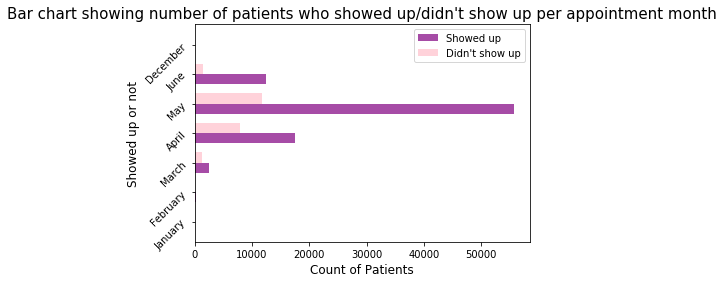

In [58]:
#Create a bar plot showing the number of patients who showed up and didn't show up for their appointment
#in each appointment month

ind = np.arange(len(show_month_list)) 
width = 0.35
show_bars = plt.barh(ind, show_month_list, width, color='purple', alpha=.7);
noshow_bars = plt.barh(ind + width, noshow_month_list, width, color='pink', alpha=.7)
plt.ylabel("Showed up or not", fontsize=12)
plt.xlabel("Count of Patients", fontsize=12)
plt.title("Bar chart showing number of patients who showed up/didn't show up per appointment month", fontsize=15)

#set yticks

locations = ind + width / 2 
plt.yticks(locations, labels, rotation=45)

#set legend
plt.legend(["Showed up", "Didn't show up"]);

#Show the statistics together with the plot
pd.DataFrame({"show prop": show_list, "no-show prop": noshow_list})

From the plot above, May has the highest number of patients showing up, then April, June and March. Due to the wide range between the values in February, January and December, the bar plot could not show them. February has the next highest number of patients who showed up, followed by December and lastly January.

### Research Question 8(Does wait time(period between when an appointment was scheduled and the actual appointment day) affect if patients show up for their appointments?)

In [59]:
#view thhe structure of wait_time values
df["wait_time"].head(2)

0   0 days
1   0 days
Name: wait_time, dtype: timedelta64[ns]

I need to extract the numeric values

In [60]:
#Extract numbers 
df["wait_time"] = df["wait_time"].astype("str").str.extract('(\d+)'). astype("int")
df["wait_time"].head()

0    0
1    0
2    0
3    0
4    0
Name: wait_time, dtype: int64

In [61]:
#Check the average wait time of patirnts who showed up and did not show up
df.groupby("no_show")["wait_time"].mean()

no_show
0     8.754759
1    15.832385
Name: wait_time, dtype: float64

On average, people who showed up waited for fewer number of days than patients who did not show up for their appointment.

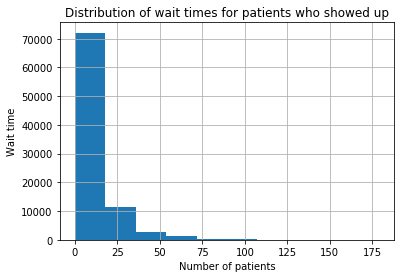

In [62]:
#Plot a histogram showing to show distribution of wait times for patients who showed up
show_wait_time = df.query("no_show == 0")["wait_time"]
show_wait_time.hist()
plt.title("Distribution of wait times for patients who showed up")
plt.xlabel("Number of patients")
plt.ylabel("Wait time");

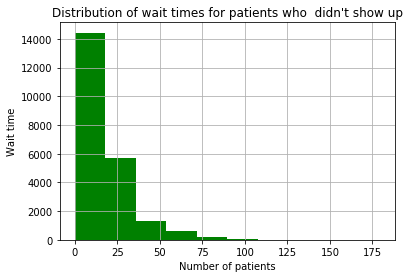

In [74]:
#Plot a histogram showing to show distribution of wait times for patients who showed up
show_wait_time = df.query("no_show == 1")["wait_time"]
show_wait_time.hist(color="green")
plt.title("Distribution of wait times for patients who  didn't show up")
plt.xlabel("Number of patients")
plt.ylabel("Wait time");

The histograms confirm that patients who showed up for their appointment generally had shorter wait times

In [64]:
#Get summary statistics of wait time column
df[["wait_time", "no_show"]].describe()

,wait_time,no_show
count,110526.000000,110526.000000
mean,10.183975,0.201934
std,15.254914,0.401445
min,0.000000,0.000000
25%,0.000000,0.000000
50%,4.000000,0.000000
75%,15.000000,0.000000
max,179.000000,1.000000


In [65]:
#Group wait time
df["wait_time"].describe()

count    110526.000000
mean         10.183975
std          15.254914
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_time, dtype: float64

In [66]:
bin_edges = [-0.1, 4, 15, 179]
#Name each wait time category based on statistics of  the column
bin_names = ["Short wait-time", "Moderate wait-time", "Long wait-time"]

#create a new column to show wait categories
df["wait_cat"] = pd.cut(x=df["wait_time"], bins=bin_edges, labels=bin_names)
df.head(1)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_of_week,appointment_day_of_week,scheduled_month,appointment_month,wait_time,age_cat,wait_cat
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,April,April,0,Senior Adults,Short wait-time


In [67]:
#Create a dataframe for patients that showed up
show_df = df.query("no_show == 0")
#confirm the new df has only patients that showed
show_df["no_show"].unique()

array([0])

In [68]:
#Group data to show the number of patients who showed up in each wait_cat
show_df_count = show_df.groupby("wait_cat")["no_show"].count()
show_df_count

wait_cat
Short wait-time       52145
Moderate wait-time    18400
Long wait-time        17662
Name: no_show, dtype: int64

,no_show
wait_cat,
Short wait-time,52145
Moderate wait-time,18400
Long wait-time,17662


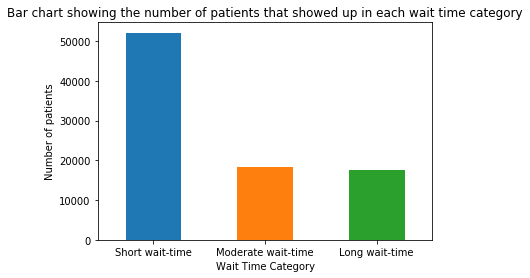

In [69]:
#Bar plot to show the  number of patients who showed up in each wait_cat
show_df_count.plot(kind="bar")
plt.title("Bar chart showing the number of patients that showed up in each wait time category")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of patients")
plt.xticks(rotation=360);
#Display summary statistics
pd.DataFrame(show_df_count)

The bar chart above shows that patients with short wait times showed up more for their appointment

### Research Question 9(What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [70]:
#A correlation matrix to show correlations between variables
df.corr()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,wait_time
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327,0.034822
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134,-0.030427
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704,-0.017224
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181,-0.027193
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197,-0.038522
handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077,-0.019831
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428,0.398138
no_show,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000,0.186253
wait_time,0.034822,-0.030427,-0.017224,-0.027193,-0.038522,-0.019831,0.398138,0.186253,1.000000


From the correlation matrix, it can be seen than wait_time has the highest correlation with no_show, followed by sms_received. This means, without going deeper into statistical testing, the wait time and sms received might be the most important factors to determine whether or not a patient showed up for their appointment, however, without statistical tests, I can not confirm this.

### Research Question 10(What are the top 5 neighborhoods that showed up for their appointments?)

In [71]:
#View the number of unique neighborhoods
df["neighborhood"].nunique()

81

In [72]:
#Group the dataframe by neighborhood and neighborhoods with the highest counts
grouped_df = show_df.groupby("neighborhood")["no_show"].count().reset_index()
grouped_df_sorted = grouped_df.sort_values('no_show', ascending=False)
#view the top 5 neighborhoods
top_5 = grouped_df_sorted.head()
top_5

,neighborhood,no_show
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635


,neighborhood,no_show
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635


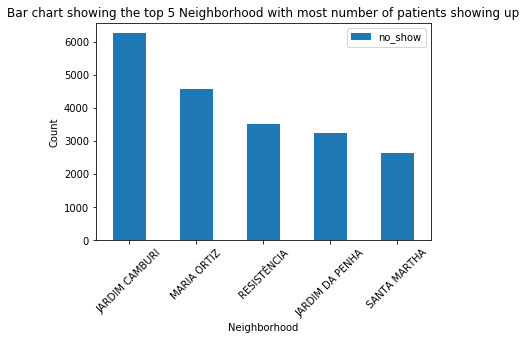

In [75]:
#Plot bar chat of top 5 neighborhoods
top_5.plot(kind="bar")
#set xticks
labels = list(top_5["neighborhood"])
location = (0, 1, 2, 3, 4)
plt.xticks(location, labels, rotation=45)
#set title
plt.title("Bar chart showing the top 5 Neighborhood with most number of patients showing up")
#set x and y labels
plt.xlabel("Neighborhood")
plt.ylabel("Count");

top_5

The bar chart above shows the top 5 neighborhoods with highest number of patients showing up for their appointment

## Conclusions

Based on the analysis carried out and visualizations, I have to the following conclusions about the dataset:
1. Most patients showed up for their appointment, with only about 20% of patients that did not show up.
2. There is not much difference between how males and females showed up for their appointment, although males generally showed up more.
3. Senior adults(60+) showed up the most for their appointment, while teenagers(13-19) showed up least. 
4. Patients who did not receive SMS showed up more for their appointments than patients who received SMS.
5. Patients who are not on scholarship showed up more for their appointment.
6. Patients with health conditions generally showed up more for their appointments than patients without health conditions.
7. Patients did not really show up for their appointment during the weekend(saturday and sunday), they showed up more on Tuesday. Also patients did not show up for their appointment between July and August, and showed up most in May.
8. Patients who showed up for their appointment generally had short wait times.
9. Wait time and whether a patient received SMS might be important factors in determining whether a patient will show up for their appointment, more statistical tests need to be performed to explore this.
10. Patients showed up the most for their appointment in "Jardim Camburi" neighborhood

## Limitations
1. There is no information that talks about the distance between where the patient lives and the medical center, this can be used to determine if distance affects how patients show up for their appointments.
2. I did not use statistical tests to confirm the validity of my analysis results, since the analysis involves comparison between variables. Statistical tests would have help establish dependency relationships.

## References
1. https://www.geeksforgeeks.org/pandas-cut-method-in-python/
2. https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age
3. https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
4. https://www.w3schools.com/python/matplotlib_pie_charts.asp
5. https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
6. https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
7. https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
8. https://datascience.stackexchange.com/questions/41448/how-to-rename-columns-that-have-the-same-name
9. https://www.machinelearningplus.com/pandas/pandas-histogram/
10. https://sparkbyexamples.com/python/pandas-percentage-total-with-groupby/

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0